IV CURVE TAKEN WITH KEITHLEY SOURCE

Set-up: Run current from Force-HI to Force-LOW across sample.  Measure current across sample using senseing pins.

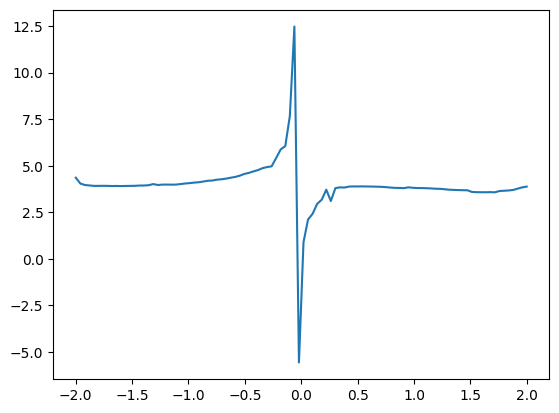

In [3]:
lower_bound = -2 # Lowest and 
upper_bound = 2  # highest DC offsets
max_current = 0.02 # highest current allowed by Keithley in Amps
num_samples = 100

import pyvisa
import numpy as np
import matplotlib.pyplot as plt

rm = pyvisa.ResourceManager()
keithley = rm.open_resource('GPIB::19::INSTR')
keithley.write(':FORM:DATA ASCII')
keithley.write(':SOUR:FUNC VOLT')
keithley.write(':SENS:FUNC CURR:DC')
keithley.write(':SENS:CURR:PROT {}'.format(max_current)) #units automatically in Amps
keithley.write(':OUTP ON')

vin = np.linspace(lower_bound, upper_bound, num_samples)
iout = []
for v in vin:
    keithley.write(':SOUR:VOLT {}'.format(v))
    iout.append(float(keithley.query(':READ?')))

iout = np.array(iout)
plt.plot(vin, iout)
plt.show()

In [5]:
np.savetxt('File_Name.txt', np.stack(vin, iout), delimeter = ',')

Alternative (Probably Faster) Method

In [ ]:
lower_bound = -2 # Lowest and 
upper_bound = 2  # highest DC offsets
max_current = 0.02 # highest current allowed by Keithley in Amps
num_samples = 100

import pyvisa
import numpy as np
import matplotlib.pyplot as plt

rm = pyvisa.ResourceManager()
keithley = rm.open_resource('GPIB::19::INSTR')
keithley.write(':FORM:DATA ASCII')
keithley.write(':SOUR:FUNC VOLT')
keithley.write(':SENS:FUNC CURR:DC')
keithley.write(':SENS:CURR:PROT {}'.format(max_current)) #units automatically in Amps
keithley.write(':OUTP ON')

vin = np.linspace(lower_bound, upper_bound, num_samples)

keithley.write(':TRAC:MAKE "I_V_Curve", {}'.format(num_samples))
keithley.write(':SOUR:SWE:VOLT:LIN {}, {}, {}, -1, 1, BEST, OFF, OFF, "I_V_Curve"'.format(lower_bound, \
                                                                                          upper_bound, num_samples))
keithley.write('INIT')
iout = keithley.query(':TRAC:DATA? 1, {}'.format(num_samples))
keithley.write(':TRAC:DEL "I_V_Curve"')
iout = float(np.array(iout.split()))

plt.plot(iout)